<a href="https://colab.research.google.com/github/vishvas-chauhan/First_Repository/blob/master/weightage/regression/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import gspread
import gspread_dataframe as gd
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

## first part

In [ ]:
Sheet40 = gc.open("FW21 Nomenclatures Main").worksheet("FW21 Nomenclatures MAIN")
df_Sheet40 = gd.get_as_dataframe(Sheet40)

In [ ]:
df_Sheet40.columns=df_Sheet40.iloc[1]

In [ ]:
df_Sheet40=df_Sheet40.iloc[2:]

In [ ]:
df=df_Sheet40[['Style','Qty status']]

In [ ]:
df.head(2)

1,Style,Qty status
2,C042FW21M,RM not sent yet
3,C042FW21M,RM not sent yet


In [ ]:
df=df.groupby(['Style','Qty status'])['Qty status'].count().rename("weightage")

In [ ]:
df

Style       Qty status     
A003ICONW   RM not sent yet    18
            Received less       2
A004FW21W   Quantity OK         4
            RM not sent yet    14
A004ICONW   Quantity OK         4
                               ..
UW023ICONW  RM not sent yet     6
UW024ICONW  Quantity OK         3
            RM not sent yet    27
UW030ICONM  Quantity OK         2
            RM not sent yet    16
Name: weightage, Length: 330, dtype: int64

In [ ]:
df=df / df.groupby(level=0).sum()

In [ ]:
df

Style       Qty status     
A003ICONW   RM not sent yet    0.900000
            Received less      0.100000
A004FW21W   Quantity OK        0.222222
            RM not sent yet    0.777778
A004ICONW   Quantity OK        0.222222
                                 ...   
UW023ICONW  RM not sent yet    0.857143
UW024ICONW  Quantity OK        0.100000
            RM not sent yet    0.900000
UW030ICONM  Quantity OK        0.111111
            RM not sent yet    0.888889
Name: weightage, Length: 330, dtype: float64

In [ ]:
df=df.reset_index()

In [ ]:
df.head(5)

,Style,Qty status,weightage
0,A003ICONW,RM not sent yet,0.900000
1,A003ICONW,Received less,0.100000
2,A004FW21W,Quantity OK,0.222222
3,A004FW21W,RM not sent yet,0.777778
4,A004ICONW,Quantity OK,0.222222


In [ ]:
df=df[df['Qty status']=='Quantity OK']

In [ ]:
df['>50% Sent']=np.where(df['weightage']>=0.50, 'yes', 'no')

In [ ]:
df['>50% Sent'].value_counts()

no     131
yes      7
Name: >50% Sent, dtype: int64

In [ ]:
df.weightage.isnull().count()

138

## nom2

In [ ]:
df2=df_Sheet40[['Style','RM ID','Qty status']]

In [ ]:
df2['new'] = np.where(df2['RM ID'].str.startswith('F'),'Fabric',
                      np.where(df2['RM ID'].str.startswith('TR'), 'Fabric',
                       
                      np.where(df2['RM ID'].str.startswith('P'), 'Packaging', 
                                                                          np.where(df2['RM ID'].str.startswith('T'), 'Trims',
                                                                                   np.where(df2['RM ID'].str.startswith('L'), 'Labeling',0)))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2=df2[['Style','Qty status','new']]

In [ ]:
df3=df2[df2['new']=='Fabric']

In [ ]:
df3=df3.groupby(['Style','new','Qty status'])['Qty status'].count().rename("weightage")

In [ ]:
df3.head(5)

Style       new     Qty status     
A003ICONW   Fabric  RM not sent yet    2
A004FW21W   Fabric  RM not sent yet    2
A004ICONW   Fabric  RM not sent yet    2
A005FW21XU  Fabric  RM not sent yet    3
A008FW21X   Fabric  RM not sent yet    1
Name: weightage, dtype: int64

In [ ]:
df3 =df3 / df3.groupby(level=0).sum()

In [ ]:
df3

Style       new     Qty status     
A003ICONW   Fabric  RM not sent yet    1.0
A004FW21W   Fabric  RM not sent yet    1.0
A004ICONW   Fabric  RM not sent yet    1.0
A005FW21XU  Fabric  RM not sent yet    1.0
A008FW21X   Fabric  RM not sent yet    1.0
                                      ... 
UW001ICONW  Fabric  RM not sent yet    1.0
UW006ICONM  Fabric  RM not sent yet    1.0
UW010ICONW  Fabric  RM not sent yet    1.0
UW024ICONW  Fabric  RM not sent yet    1.0
UW030ICONM  Fabric  RM not sent yet    1.0
Name: weightage, Length: 214, dtype: float64

In [ ]:
df3=df3.reset_index()

In [ ]:
df3=df3[df3['Qty status']=='Quantity OK']


In [ ]:
df3['fabricdone']=np.where(df3['weightage']==1,'yes','no')

In [ ]:
df4=df2[df2['new']=='Trims']

In [ ]:
df4=df4.groupby(['Style','new','Qty status'])['Qty status'].count().rename("weightage")

In [ ]:
df4.head(5)

Style       new    Qty status     
A003ICONW   Trims  RM not sent yet    2
A005FW21XU  Trims  RM not sent yet    1
A012FW21W   Trims  RM not sent yet    4
A023ICONX   Trims  RM not sent yet    2
A024FW21WU  Trims  RM not sent yet    1
Name: weightage, dtype: int64

In [ ]:
df4 =df4 / df4.groupby(level=0).sum()

In [ ]:
df4

Style       new    Qty status     
A003ICONW   Trims  RM not sent yet    1.000000
A005FW21XU  Trims  RM not sent yet    1.000000
A012FW21W   Trims  RM not sent yet    1.000000
A023ICONX   Trims  RM not sent yet    1.000000
A024FW21WU  Trims  RM not sent yet    1.000000
                                        ...   
T226FW21XU  Trims  Received less      0.166667
T230FW21M   Trims  RM not sent yet    1.000000
UW005ICONW  Trims  Quantity OK        1.000000
UW012ICONW  Trims  Quantity OK        1.000000
UW024ICONW  Trims  RM not sent yet    1.000000
Name: weightage, Length: 140, dtype: float64

In [ ]:
df4=df4.reset_index()

In [ ]:
df4=df4[df4['Qty status']=='Quantity OK']


In [ ]:
df4['trimsdone']=np.where(df4['weightage']==1,'yes','no')

In [ ]:
first = gc.open("FW21 Nomenclatures Main").worksheet("60percent")
#df_Concateall = gd.get_as_dataframe(Concateall)
#updated = df_Concateall.append(result)
#range_of_cells = Concateall.range('A1:AF200')
first.clear()
gd.set_with_dataframe(first, df)

second = gc.open("FW21 Nomenclatures Main").worksheet("fabricdone")
#df_Concateall = gd.get_as_dataframe(Concateall)
#updated = df_Concateall.append(result)
second.clear()
gd.set_with_dataframe(second, df3)

third = gc.open("FW21 Nomenclatures Main").worksheet("trimsdone")
#df_Concateall = gd.get_as_dataframe(Concateall)
#updated = df_Concateall.append(result)
third.clear()
gd.set_with_dataframe(third, df4)


## Stop


In [ ]:
kjhgkhk


NameError: ignored

In [ ]:
df4.head()

,Style,new,Qty status,weightage,trimsdone
10,A117FW21X,Trims,Quantity OK,0.200000,no
33,C042FW21M,Trims,Quantity OK,0.083333,no
35,C043FW21W,Trims,Quantity OK,0.111111,no
38,C045FW21X,Trims,Quantity OK,0.250000,no
53,J061FW21M,Trims,Quantity OK,0.125000,no


In [ ]:
y = df4.iloc[:, 3].values

In [ ]:
X = df4.iloc[:, 1:2].values
y = df4.iloc[:, 2:4].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [ ]:
X = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
X = np.arange(0,100).reshape(-1,1)

In [ ]:
X.ndim 

2

In [ ]:
X = df4.iloc[:,df4.columns !='weightage'].values

In [ ]:
y = df4.iloc[:, df4.columns =='weightage']

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
X[0:5]

array([['Trims', 'Quantity OK', 'no'],
       ['Trims', 'Quantity OK', 'no'],
       ['Trims', 'Quantity OK', 'no'],
       ['Trims', 'Quantity OK', 'no'],
       ['Trims', 'Quantity OK', 'no']], dtype=object)

In [ ]:
X = X[:, 1:]

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [ ]:
#plot the actual and predictions

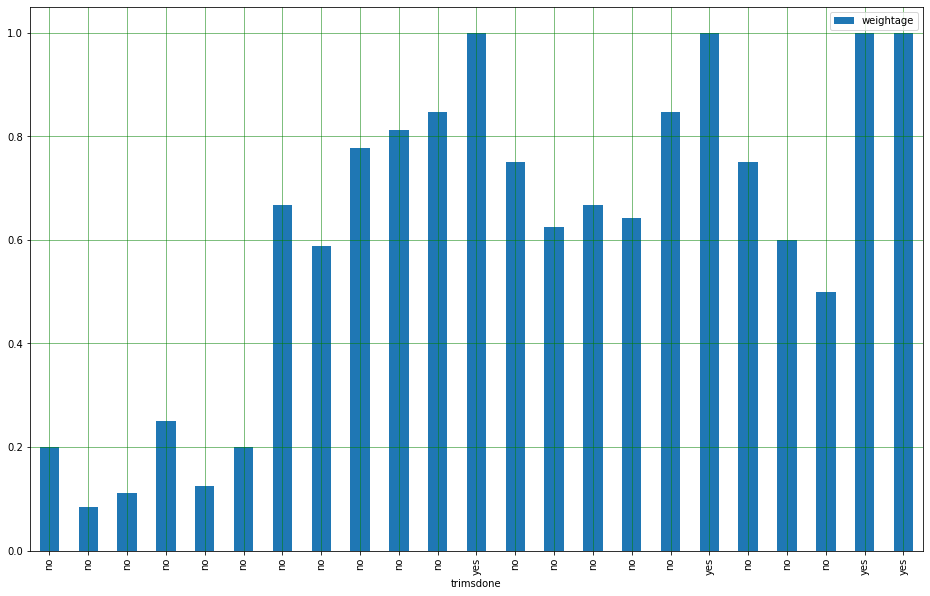

In [ ]:
df4 = df4.head(25)
df4.plot(x='trimsdone',kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
#evaluation Metrics 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
#evaluation Metrics
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))
print('Balanced Accuracy Score:', metrics.balanced_accuracy_score(y_test, y_pred))
print('Average Precision:',metrics.average_precision_score(y_test, y_pred))

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [ ]:
new_data = np.array([66952.7,28,8770.1])
new_data=new_data.reshape(-1,3)
sc.fit_transform(new_data)


array([[0., 0., 0.]])

In [ ]:
#save the model in the disk
import pickle
# save the model to disk
filename = 'reg_model.sav'
pickle.dump(regressor, open(filename, 'wb'))
# load the model from disk
filename1 = 'reg_model.sav'
loaded_model = pickle.load(open(filename1, 'rb'))

In [ ]:
from sklearn.externals import joblib  
# Save the model as a pickle in a file 
joblib.dump(regressor, 'regressor.pkl') 
  
# Load the model from the file 
loaded_model2 = joblib.load('regressor.pkl')  
  
# Use the loaded model to make predictions 
loaded_model2.predict(X_test)

In [ ]:
df_1 = df.head(25)
df_1.plot(kind=’bar’,figsize=(16,10))
plt.grid(which=’major’, linestyle=’-’, linewidth=’0.5', color=’green’)
plt.grid(which=’minor’, linestyle=’:’, linewidth=’0.5', color=’black’)
plt.show()

In [ ]:
def get_status(df):
    if df['TIME_1'] == df['TIME_MIN']:
        return df['STATUS_1']
    elif df['TIME_2'] == df['TIME_MIN']:
        return df['STATUS_2']
    elif df['TIME_3'] == df['TIME_MIN']:
        return df['STATUS_3']
    elif df['TIME_4'] == df['TIME_MIN']:
        return df['STATUS_4']
    else:
        return df['STATUS_5']

df['STATUS'] = df.apply(get_status, axis = 1)

In [ ]:
def status(df4):
  if df4['Style'].str.contains('C')==True:
    return df4['weightage']
  elif df4['Style'].str.contains('A')==True:
    return df4['new']
  else:
    return df4['trimsdone']

df4['status']=df4.apply(status,axis=1)

AttributeError: ignored

In [ ]:
#df.value.str[:3]+'10'+df.value.str[5:]

In [ ]:
#df4['Style'].str[:3]

In [ ]:
#cond = [df4['Style'].str[3:5] == '3F']
#choice= [df4['Style'].str[:3]+'--'+df4['Style'].str[5:]]
#df4['Sty']= np.select(cond,choice,default=df4['Style'])
#df4

In [ ]:
list=['Trims']

In [ ]:
[x for x in df4['new'] if x not in list]

In [ ]:
my_list=[x for x in empty_list if x not in stopwords]

In [ ]:
for i, r in df4.iterrows():
  print(i,r[0])

In [ ]:
df = pd.DataFrame([[100,200,150,400,500,'a','b','a','c','a',100], [300,400,200,500,250,'b','b','c','c','c',200]], columns=['TIME_1', 'TIME_2', 'TIME_3', 'TIME_4', 'TIME_5','STATUS_1','STATUS_2','STATUS_3','STATUS_4','STATUS_5','TIME_MIN'])


In [ ]:
def get_status(df):
    if df['TIME_1'] == df['TIME_MIN']:
        return df['STATUS_1']
    elif df['TIME_2'] == df['TIME_MIN']:
        return df['STATUS_2']
    elif df['TIME_3'] == df['TIME_MIN']:
        return df['STATUS_3']
    elif df['TIME_4'] == df['TIME_MIN']:
        return df['STATUS_4']
    else:
        return df['STATUS_5']

df['STATUS'] = df.apply(get_status, axis = 1)

In [ ]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

    def inverse_transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.inverse_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.inverse_transform(col)
        return output

    def fit_inv_transform(self,X,y=None):
        return self.fit(X,y).inverse_transform(X)        

In [ ]:
df4.head()

In [ ]:
def foo():
  for col in df4.columns:
    if df4[col].dtype == object:
      return df4[col].apply(le.fit_transform)

In [ ]:
df4.apply(foo)

In [ ]:
for col in df4.columns:
  if df4[col].dtype == str: # Although, you see the dtype `object` but `str` is also fine 
  return df4[col].apply(le.fit_transform)

In [ ]:
dff=MultiColumnLabelEncoder(columns = ['new','Style','Qty status','trimsdone']).fit_transform(df4)

In [ ]:
MultiColumnLabelEncoder(columns = ['new','Style','Qty status','trimsdone']).fit_inv_transform(dff)

In [ ]:
#df4.apply(le.inverse_transform)

In [ ]:
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = le.fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output

In [ ]:
multi = MultiColumnLabelEncoder(columns=['Style','Qty status'])

In [ ]:
X = multi.fit_transform(df4)

In [ ]:
X.head()

In [ ]:
inv = multi.inverse_transform(X)

In [ ]:
a.head()

In [ ]:
X.apply(le.inverse_transform)

In [ ]:
text = "word1anotherword23nextone456lastone333"
numbers = [x for x in text if x.isdigit()==True]
print(''.join(numbers))

In [ ]:
y = []
for x in (f(i) for i in range(5)):
    for a in x:
        y.append(a)

In [ ]:
for col in train.columns:
  if train[col].dtype == 'object':
    le = LabelEncoder()
    le.fit(list(train[col].astype(str).values)+list(test[col].astype(str).values))
    train[col] = le.transform(list(train[col].astype(str).values))
    test[col] = le.transform(list(train[col].astype(str).values))